<a href="https://colab.research.google.com/github/mayk9252m/Exploratory-Data-Analysis-With-Python-Pandas-EDA-/blob/main/Most_liked_music_app_in_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎵 Music App Review Analysis
This notebook performs an Exploratory Data Analysis (EDA) on app store music review data to understand:
- Which music apps are most popular in different countries
- How users rate these apps
- Which app has the highest review count country-wise

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Step 1: Load and Preview the Dataset
We begin by loading the CSV file using `pandas` and previewing the first few rows to understand the structure of the dataset.

In [9]:
# Loading the dataset file (file.csv)
df = pd.read_csv("/content/app_store_music_reviews.csv")

In [10]:
df.head()

,app,country,title,review,rating,date
0,Spotify,MX,Muy buena aplicación de música. Casi sin anunc...,La,5,2025-05-21 18:57:56-07:00
1,SoundCloud,US,I have loved you from day 1 bi,"Nah fr tho, omm nothing but love for SoundClou...",5,2025-05-21 18:56:41-07:00
2,Spotify,MX,Los amo,Los amo,5,2025-05-21 18:56:12-07:00
3,Deezer,US,Must have a premium account to download music,I got this music app so I could download songs...,1,2025-05-21 18:50:34-07:00
4,Apple Music,US,4 star,I tunes don’t have all the songs like to liste...,4,2025-05-21 18:50:04-07:00


In [11]:
df.shape

(5640, 6)

## 🔎 Step 2: Dataset Information & Missing Values
We use `.info()` and `.isnull().sum()` to:
- View the column types and number of entries
- Check for any missing values in the dataset

In [12]:
# For Data types & non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5640 entries, 0 to 5639
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   app      5640 non-null   object
 1   country  5640 non-null   object
 2   title    5640 non-null   object
 3   review   5640 non-null   object
 4   rating   5640 non-null   int64 
 5   date     5640 non-null   object
dtypes: int64(1), object(5)
memory usage: 264.5+ KB


In [13]:
# Checking for missing values
df.isnull().sum()

,0
app,0
country,0
title,0
review,0
rating,0
date,0


**Result:** So, as this Dataset don't have any null set. So, we countiny the process of EDA.

## 📊 Step 3: Descriptive Statistics
We generate descriptive statistics using `.describe()` to get a quick summary of:
- Count of values
- Unique values (for categorical data)
- Frequency of top items, etc.

In [14]:
# Descriptive stats
df.describe(include='all')

,app,country,title,review,rating,date
count,5640,5640,5640,5640,5640.000000,5640
unique,6,20,4788,5540,NaN,5637
top,SoundCloud,MX,Spotify,Love it,NaN,2025-05-21 12:00:56-07:00
freq,1000,300,36,10,NaN,2
mean,NaN,NaN,NaN,NaN,3.554433,NaN
std,NaN,NaN,NaN,NaN,1.664505,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,NaN,NaN,NaN,4.000000,NaN
75%,NaN,NaN,NaN,NaN,5.000000,NaN


## 🎯 Step 4: Total Reviews per Music App
We create a bar plot using `seaborn.countplot` to visualize the number of reviews each music app has received. This helps identify which apps are generally more reviewed.

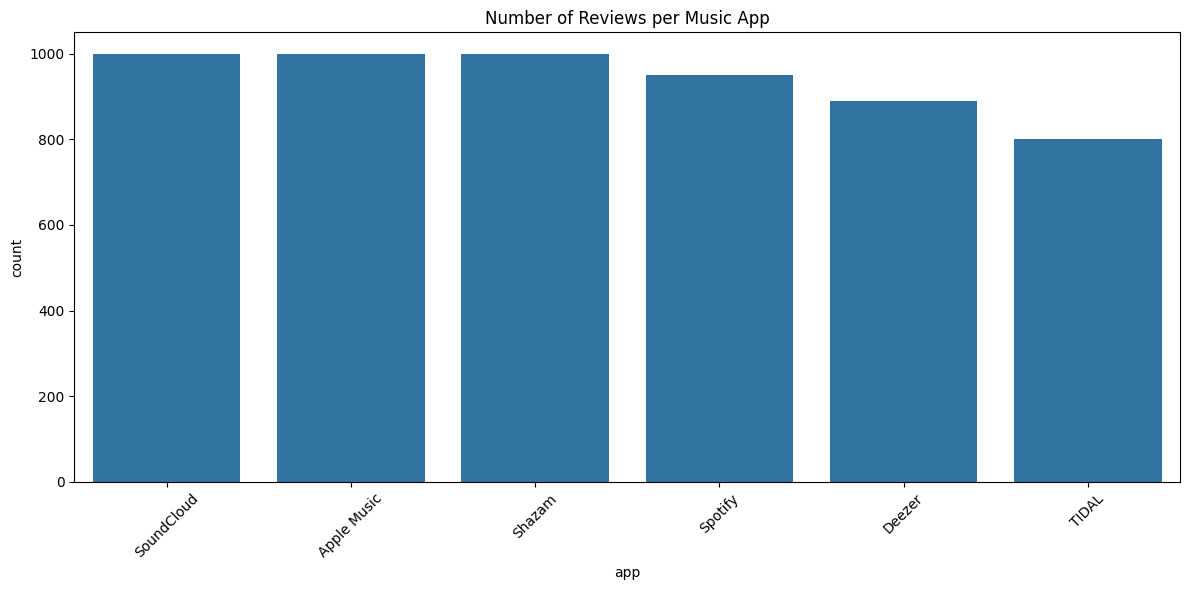

In [15]:
# Count of reviews per app

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='app', order=df['app'].value_counts().index)
plt.title('Number of Reviews per Music App')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

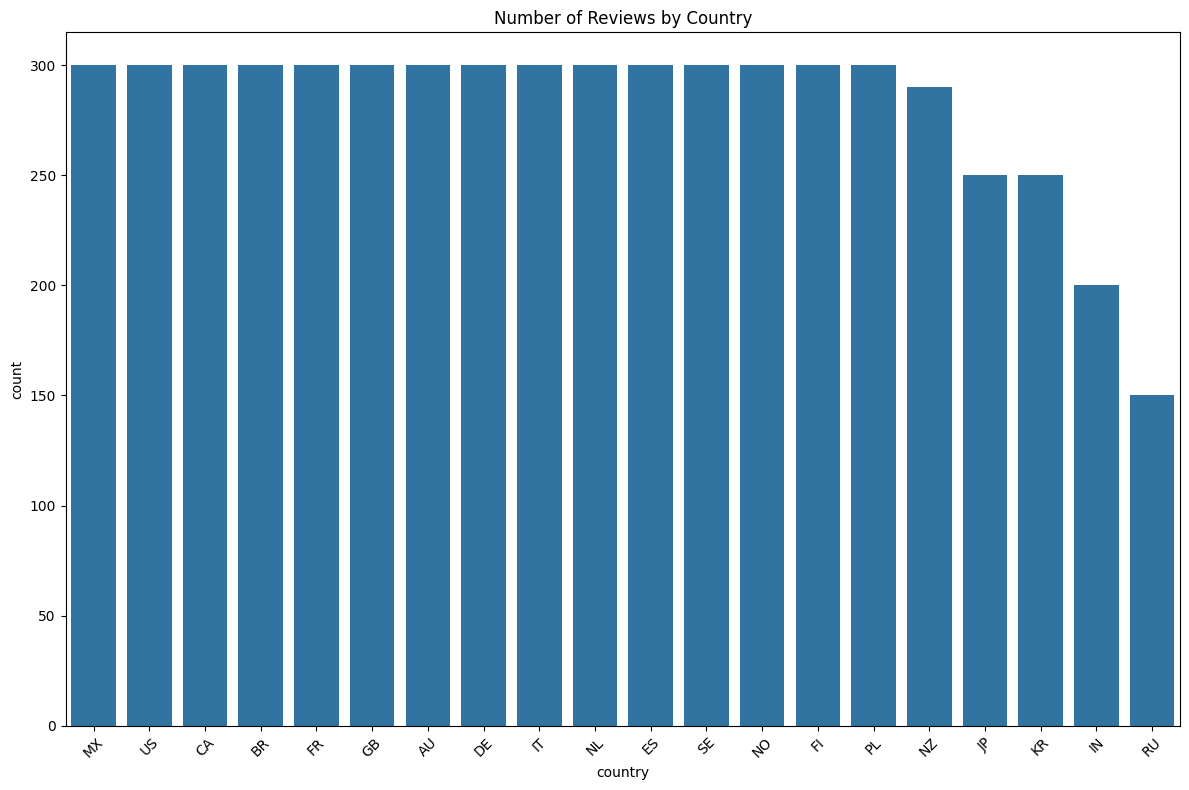

In [16]:
# Reviews by country
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Number of Reviews by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Most loved app in each country by number of reviews
most_reviews = df.groupby(['country', 'app']).size().reset_index(name='review count')
most_loved = most_reviews.loc[most_reviews.groupby('country')['review count'].idxmax()]

In [18]:
print("\nMost Loved Music App by Country:")
print(most_loved)


Most Loved Music App by Country:
    country          app  review count
0        AU  Apple Music            50
6        BR  Apple Music            50
12       CA  Apple Music            50
18       DE  Apple Music            50
24       ES  Apple Music            50
30       FI  Apple Music            50
36       FR  Apple Music            50
42       GB  Apple Music            50
48       IN  Apple Music            50
52       IT  Apple Music            50
58       JP  Apple Music            50
63       KR  Apple Music            50
68       MX  Apple Music            50
74       NL  Apple Music            50
80       NO  Apple Music            50
86       NZ  Apple Music            50
92       PL  Apple Music            50
98       RU  Apple Music            50
101      SE  Apple Music            50
107      US  Apple Music            50


## 🌍 Step 5: Reviews by Country
We create another bar plot to visualize the distribution of reviews by country. This gives insight into the geographic diversity of the data and where most of the reviews come from.

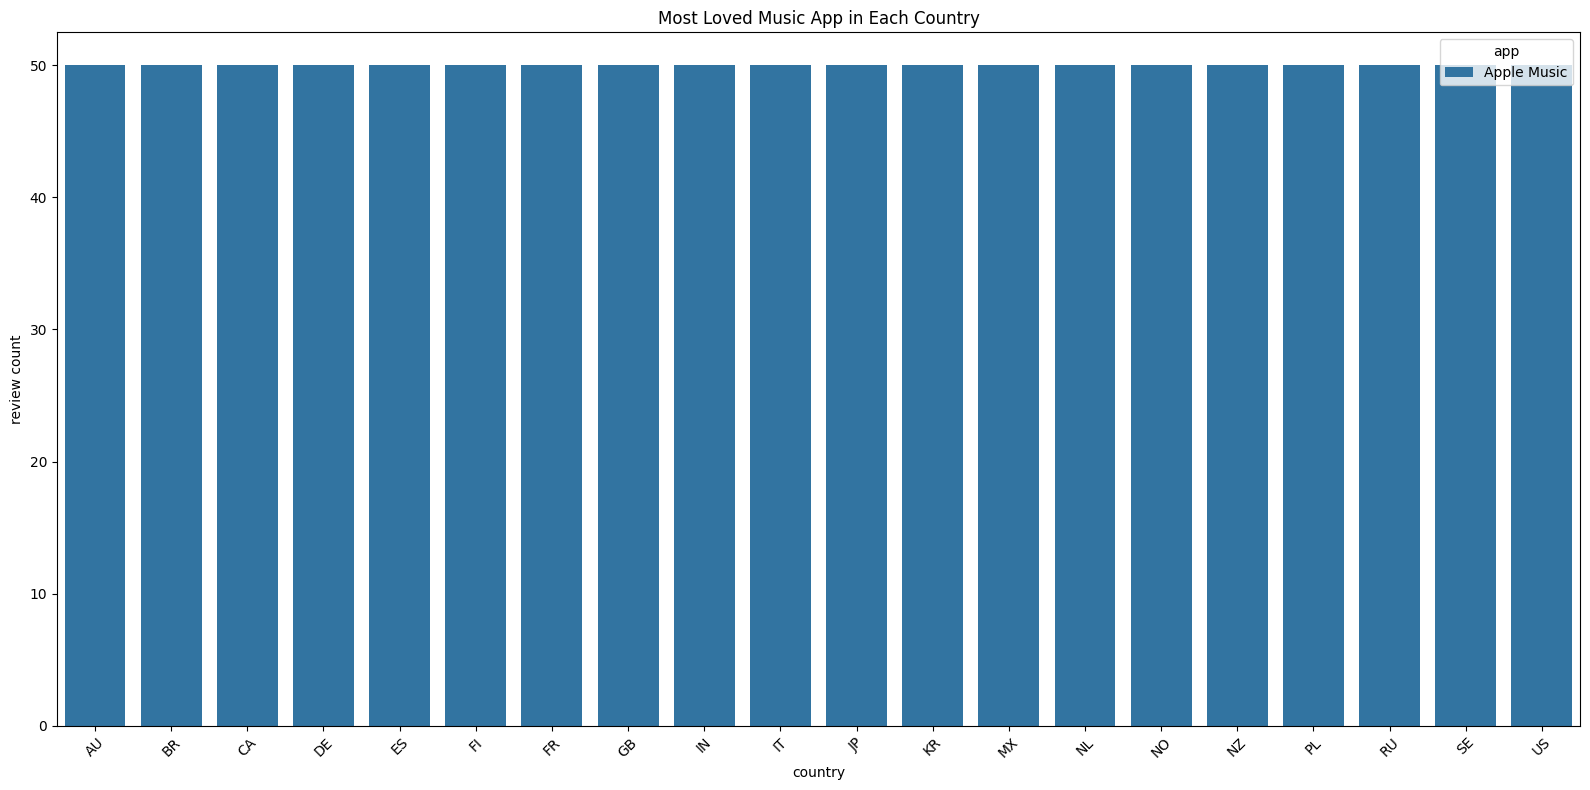

In [19]:
# Plot most loved app in each country
plt.figure(figsize=(16, 8))
sns.barplot(data=most_loved, x='country', y='review count', hue='app', dodge=False)
plt.title('Most Loved Music App in Each Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🏆 Step 6: Most Loved Music App in Each Country
To find the most loved app per country:
- We group the data by `Country` and `App Name`
- Count the number of reviews
- Use `.idxmax()` to extract the app with the highest count for each country

We then display and visualize this information in a grouped bar chart.

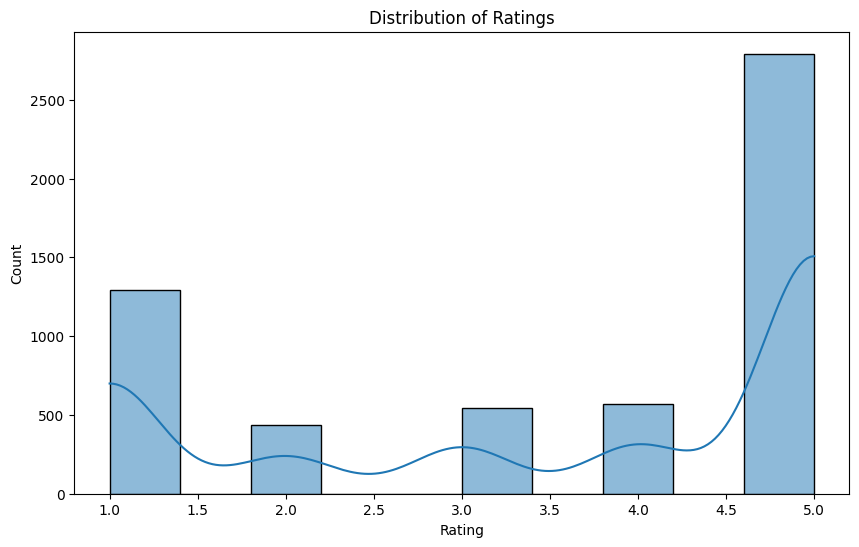

In [20]:
# If rating column exists, analyze rating distribution
if 'rating' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='rating', bins=10, kde=True)
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

In [21]:
    # Average rating by app
    avg_ratings = df.groupby('app')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)
    print("\nAverage Rating by App:")
    print(avg_ratings)


Average Rating by App:
           app    rating
0  Apple Music  3.875000
3   SoundCloud  3.863000
2       Shazam  3.844000
4      Spotify  3.507368
5        TIDAL  3.311250
1       Deezer  2.791011


## ⭐ Step 7: Rating Analysis (If Available)
If the dataset contains a `Rating` column:
- We plot a histogram of ratings to check the distribution
- We calculate the average rating for each app
- Visualize the average ratings using a bar chart

This helps us understand not just the quantity (review count), but also the quality (user satisfaction).

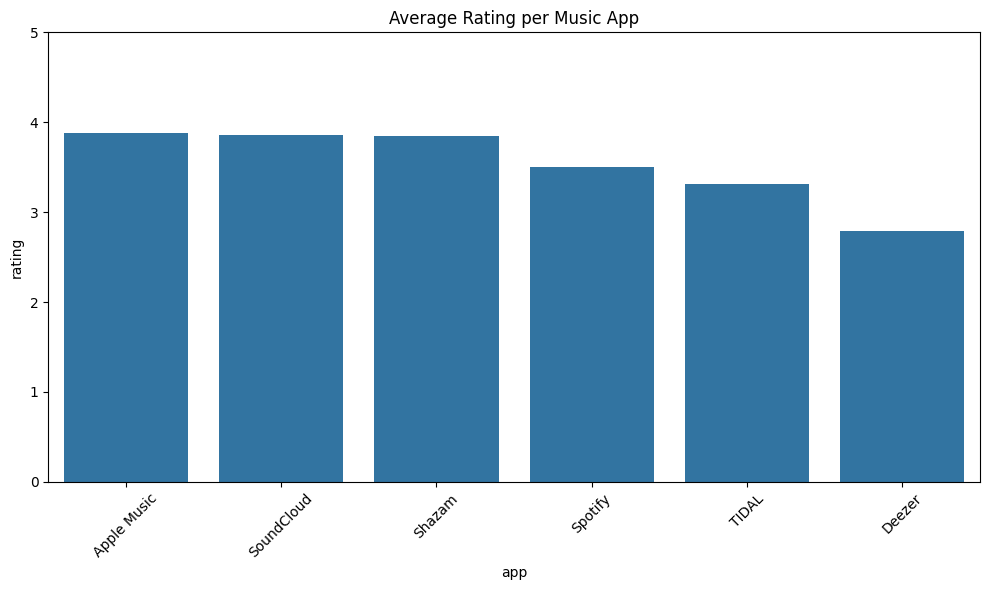

In [22]:
    # Plot average ratings
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_ratings, x='app', y='rating')
    plt.title('Average Rating per Music App')
    plt.xticks(rotation=45)
    plt.ylim(0, 5)
    plt.tight_layout()
    plt.show()

## 📌 Conclusion
With this analysis, we can:
- Determine the **most reviewed and popular music apps** in each country
- Understand **user rating behavior**
- Gain insights into **app performance** by geography and sentiment

You can use this EDA as a foundation for further modeling, such as sentiment analysis, user segmentation, or recommendation systems.